<IPython.core.display.Javascript object>

Yakub flew from London to Seattle.
{'dep_parse': 'nsubj(flew-2, Yakub-1)\nroot(ROOT-0, flew-2)\nprep_from(flew-2, London-4)\nprep_to(flew-2, Seattle-6)', 'chunk': [('Yakub', 'S-NP'), ('flew', 'S-VP'), ('from', 'S-PP'), ('London', 'S-NP'), ('to', 'S-PP'), ('Seattle', 'S-NP'), ('.', 'O')], 'pos': [('Yakub', 'NNP'), ('flew', 'VBD'), ('from', 'IN'), ('London', 'NNP'), ('to', 'TO'), ('Seattle', 'NNP'), ('.', '.')], 'srl': [{'A1': 'Yakub', 'AM-DIR': 'from London  to Seattle', 'V': 'flew'}], 'syntax_tree': '(S1(S(NP(NNP Yakub))(VP(VBD flew)(PP(IN from)(NP(NNP London)))(PP(TO to)(NP(NNP Seattle))))(. .)))', 'verbs': ['flew'], 'words': ['Yakub', 'flew', 'from', 'London', 'to', 'Seattle', '.'], 'ner': [('Yakub', 'S-PER'), ('flew', 'O'), ('from', 'O'), ('London', 'S-LOC'), ('to', 'O'), ('Seattle', 'S-LOC'), ('.', 'O')]}


Skipping line 44759: expected 1 fields, saw 2



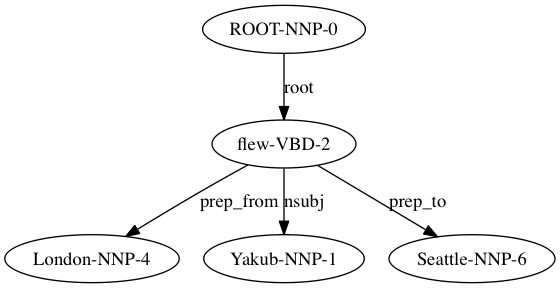

[]
simplified
[]


In [6]:
import time # to calculate the run time
import re # regular expression
import networkx as nx # to calculate the shortest path between nodes in the parsing tree
from practnlptools.tools import Annotator # to extract dep_parse, syntatic_parse, srl, verbs, words, POS, NER, chunks
import pandas as pd
from datetime import datetime, timedelta
import csv
import matplotlib.pyplot as plt
from collections import defaultdict
from pprint import pprint # print dictionaries nicer
from nxpd import draw # show in iptyhon
from IPython.display import display # to display images and draw objects 
from networkx.drawing.nx_agraph import write_dot
import sys
from nltk.tokenize import sent_tokenize
from nltk.stem import SnowballStemmer
import numpy as np
from collections import defaultdict

%matplotlib inline

#import the other functions
%run -i 'main_functions'
%run -i 'utility_functions'
%run -i 'parameters'

#t_orig = "Fortunately MN does not have a complicated exemption process when you do need one : If a notarized statement signed by the minor child 's parent or by the emancipated person is submitted to the person having supervision of the school or child care facility stating that the person has not been immunized as prescribed because of the conscientiously held beliefs of the parent of the minor child or of the emancipated person , the immunizations specified in the statement shall not be required ."
from nltk.tokenize import sent_tokenize
from practnlptools.tools import Annotator
annotator = Annotator()
#t_orig = "My son is partially vaxed and we submitted a religious exemption without any question from the district."# and we just submitted a religious exemption to the school she will be attending this fall ."#"The principal opposition parties boycotted the polls after accusations of vote-rigging , and the only other name on the ballot was a little-known challenger from a marginal political party."
#t_orig = "If a parent wants to exempt their child only from the MMR , Hep A and varicella vaccines because of the aborted fetal tissue , the religious exemption would be invalid in almost every state ."
#t_orig = "parents want to get medical exemption for their child."
#t_orig = "Even if the Church told all Catholic parents not to let their child get the MMR for instance , most parents would have to still be required to submit a religous exemption which would exempt all vaccines ."
#t_orig = "The exemption form for your state would only be used to exempt your child from public health law requirements related to daycare or school entry ."
#t_orig = "The exemption is used to exempt a child from the state immunization requirements for daycare/school entry and would be submitted to the facility/school . thought I would share this with you all : looks to me like NH is just a straight religious/medical exemption ."
#t_orig = "I have had all 4 of my kids exempted for the past 3 yrs... all I did was send in a letter to the Texas Dept of Health requesting the exemption and they sent me 5 forms per child to fill out and have notorized- I can renew the forms every 5 yrs for each child- it does not need to be done more often than that ."
t_orig = "Yakub flew from London to Seattle."
t_orig = t_orig.replace("-"," ")
t_sentences = sent_tokenize(t_orig)
for t in t_sentences:
    print t
    t_annotated = annotator.getAnnotations(t, dep_parse=True)
    print t_annotated
    dep = t_annotated['dep_parse']
    g_dir = create_dep_graph(t_annotated)
    if g_dir is None:
        print "No extraction found"
        continue
    #if SHOW_DP_PLOTS:
    plot_dep(g_dir,t)
    g_undir = g_dir.to_undirected()
    rels_pure, rels_simp = get_relations(g_dir, t_annotated, option="SVO")
    print rels_pure
    print "simplified"
    print rels_simp
    